In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [3]:
def running_mean(current_sample, previous_mean, previous_count):
    """
    Calculates a running mean.
    
    Args:
        current_sample: The latest sample (double).
        previous_mean: The previous running mean (double).
        previous_count: The previous total sample count (int).
    Returns:
        current_mean: The updated running mean (double).
        current_count: The updated total sample count (int).
    """
    current_count = previous_count + 1
    current_mean = previous_mean + (1.0 / current_count) * (current_sample - previous_mean)
    
    return current_mean, current_count

In [13]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Run an episode
    for i_episode in range(num_episodes):
        episode_states = []
        state = env.reset()
        done = False
        while not done:
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode_states.append((state, action, reward))
            state = next_state
        
        visited_states = []
        for i,(state,action,reward) in enumerate(episode_states):
            if state not in visited_states:
                state_return = sum([(discount_factor**t * t_state[2]) for t,t_state in enumerate(episode_states[i:])])
                returns_count[state] += 1
                returns_sum[state] += state_return
                V[state] = returns_sum[state] / returns_count[state]
                visited_states.append(state)  
    return V    

In [14]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

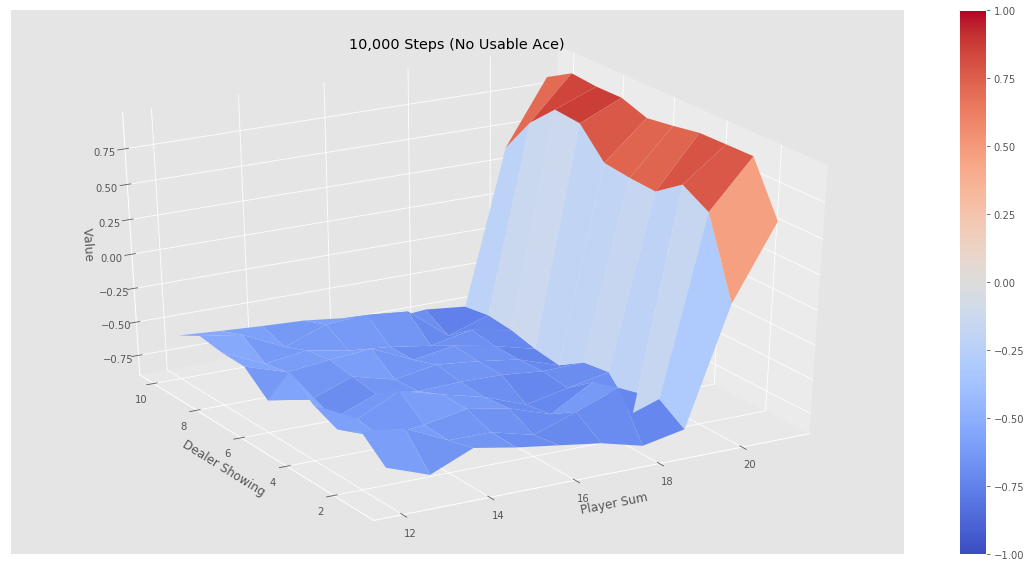

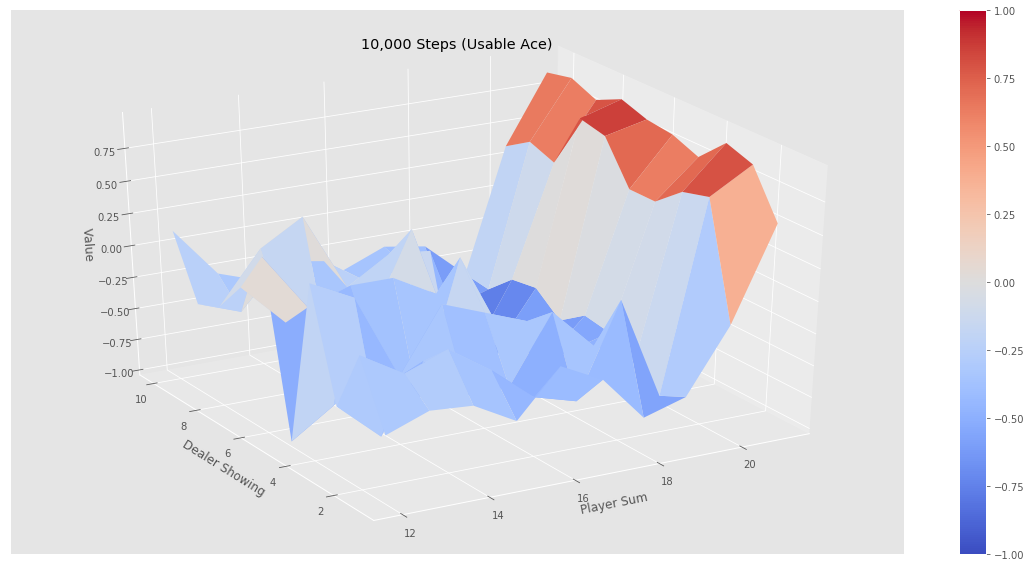

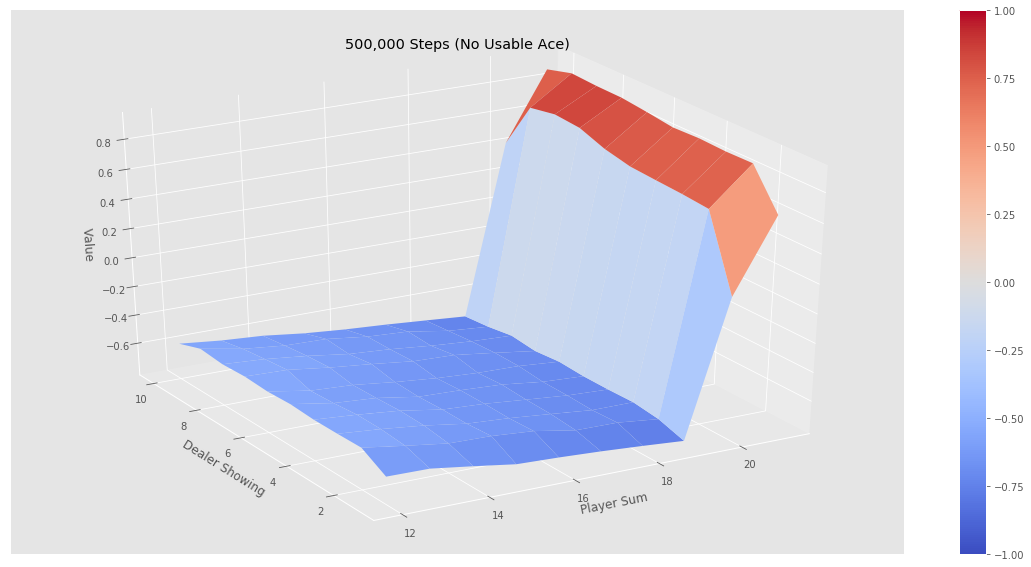

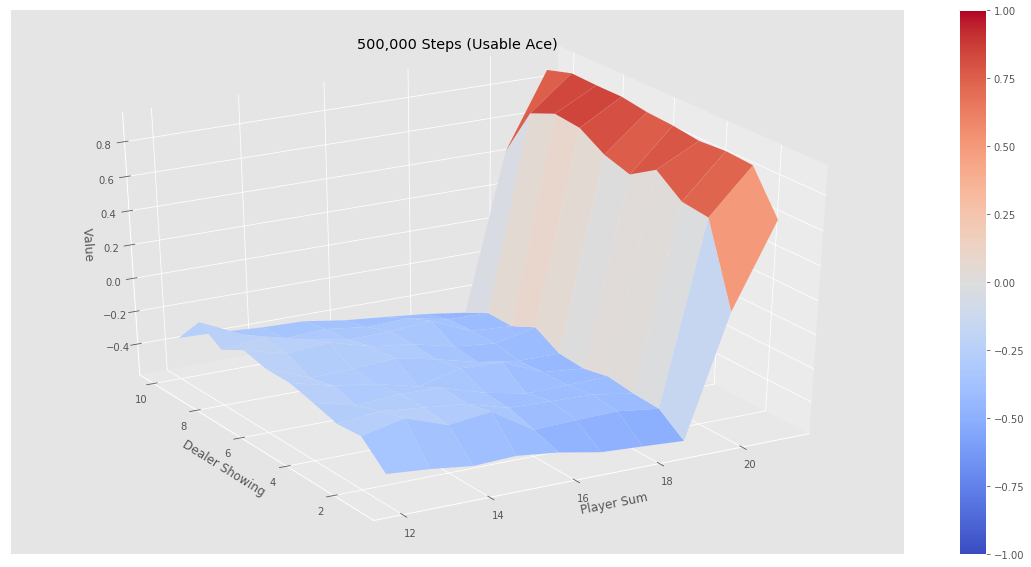

In [15]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")